In [3]:
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np

transform = transforms.Compose([transforms.ToTensor()])

train_dataset = datasets.MNIST(root="./data", train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=len(train_dataset), shuffle=False)

test_dataset = datasets.MNIST(root="./data", train=False, download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=len(test_dataset), shuffle=False)

train_images, train_labels = next(iter(train_loader))
test_images, test_labels = next(iter(test_loader))

print('Train images:', train_images.shape)
print('Train labels', train_labels.shape)
print('Test images:', test_images.shape)
print('Test labels:', test_labels.shape)

Train images: torch.Size([60000, 1, 28, 28])
Train labels torch.Size([60000])
Test images: torch.Size([10000, 1, 28, 28])
Test labels: torch.Size([10000])


ICA 2D shape: (60000, 2)


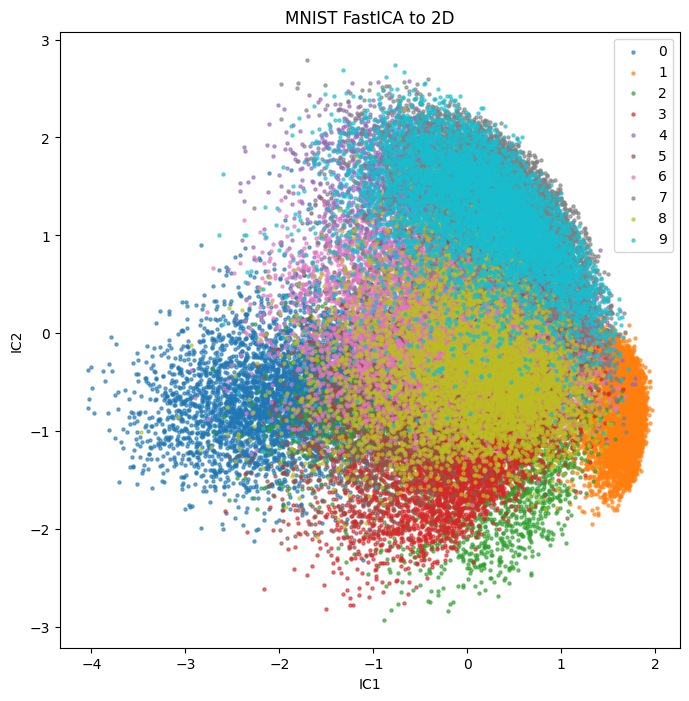

In [4]:
from sklearn.decomposition import FastICA

# Flatten to (N_samples, N_features) just like you did for PCA
X = train_images.view(train_images.size(0), -1).numpy()
y = train_labels.numpy()

# ICA to 2D
ica = FastICA(n_components=2, random_state=0, max_iter=800, tol=1e-4)
X2_ica = ica.fit_transform(X)   # shape: (60000, 2)

print("ICA 2D shape:", X2_ica.shape)

plt.figure(figsize=(8, 8))
for digit in range(10):
    mask = y == digit
    plt.scatter(
        X2_ica[mask, 0], X2_ica[mask, 1],
        s=5, label=str(digit), alpha=0.6
    )
plt.title("MNIST FastICA to 2D")
plt.xlabel("IC1")
plt.ylabel("IC2")
plt.legend()
plt.show()


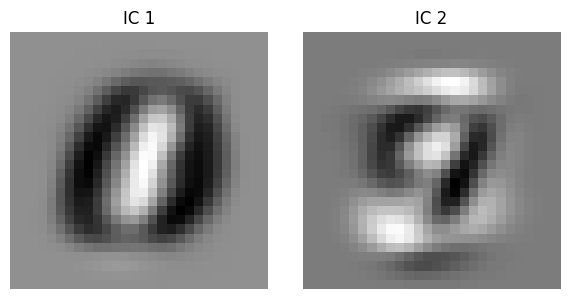

In [3]:
comps = ica.components_.reshape(-1, 28, 28)  # (2, 28, 28)
fig, axes = plt.subplots(1, 2, figsize=(6, 3))
for i, ax in enumerate(axes):
    ax.imshow(comps[i], cmap="gray")
    ax.set_title(f"IC {i+1}")
    ax.axis("off")
plt.tight_layout()
plt.show()
